In [88]:
import numpy as np
import matplotlib.pyplot as plt
import urllib
import urllib.request

Download locally and load

In [89]:
opener = urllib.request.build_opener()
opener.addheaders = [('User-Agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36')]
response = opener.open('https://c1.peakpx.com/wallpaper/19/103/818/golden-retriever-greyscale-photography-wallpaper-preview.jpg')
htmlData = response.read()
with open('golden-retriever-greyscale-photography-wallpaper-preview.jpg', 'wb') as f:
    f.write(htmlData)

Plot image

In [90]:
def plot_image(image,name_image):
    image = np.clip(image,0,255)
    image = image.astype(np.uint8)
    plt.imshow(image,cmap='gray')
    plt.title(name_image)
    plt.show()

Our image is not 3D - will use simple transformation to 2D

In [91]:
image = plt.imread('golden-retriever-greyscale-photography-wallpaper-preview.jpg').astype(float)
image = image[:,:,0]

Function for Add gaussian noise to image and cleaning with Convolution-Mean Filter 

In [92]:
def guas_noize_andClean(image,mu,std,wind_size):
    
#   Add gaussian noise to image
    rows,colm = image.shape
    gaussi_noise = np.random.normal(mu, std, rows*colm)
    gaussi_noise = gaussi_noise.reshape(rows,colm)
    image_noise = image+gaussi_noise
    
    new_image = image_noise.copy()
    mask_size = wind_size**2
    mask = np.ones([wind_size,wind_size])/mask_size
    mid = wind_size//2


# Convolution and  Mean Filter     
    for r in range(mid,rows-mid):
        for c in range(mid,colm-mid):
            window =  image_noise[r-mid:r+mid+1,c-mid:c+mid+1]
            update_pixel = (window*mask).sum()
            new_image[r,c] = update_pixel
     
    return image_noise, new_image      

Results

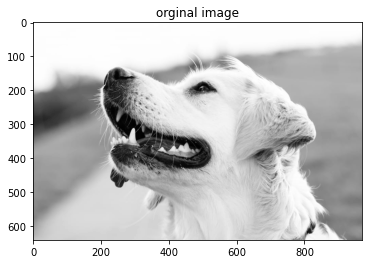

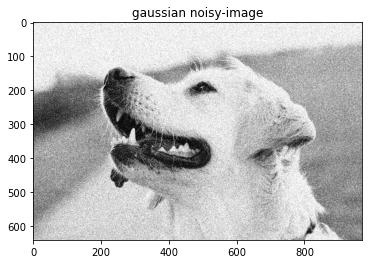

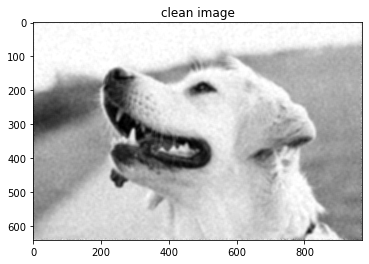

(None, None)

In [93]:
noisy_image,clean_image =  guas_noize_andClean(image,0,40,9)
plot_image(image ,"orginal image")
plot_image(noisy_image ,"gaussian noisy-image"),plot_image(clean_image ,"clean image")

Function for Add salt&pepper noise to image and cleaning with Median filter

In [94]:
def SoltP_and_clean_m_filter(image, p1, filter_size):

    # Add salt and pepper noise to image
    
    p2 = 1 - p1 
    rows,col = image.shape
    image_solt_pepper = np.zeros(image.shape,np.uint8)
    
    for i in range(rows):
        for j in range(col):            
            noise = np.random.random() 
            
            if noise<p1:
                image_solt_pepper[i][j] = 0
            elif noise>p2:
                image_solt_pepper[i][j] = 255
            else:
                image_solt_pepper[i][j] = image[i][j]
    
# Filter Median 

    clean_image = np.zeros(image.shape, image.dtype)
    rows, cols = image.shape
    ec = filter_size//2
    for row in range(ec, rows-ec):
        for col in range(ec, cols-ec):
            
            image[row, col]
            window = image[row-ec:row+ec+1, col-ec:col+ec+1]
            clean_image[row, col] = np.sort(window.flatten())[(filter_size**2)//2]
    
    return image_solt_pepper,clean_image

Results


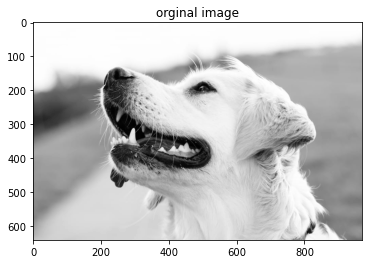

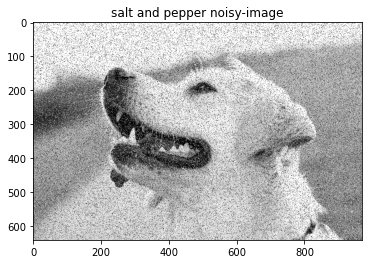

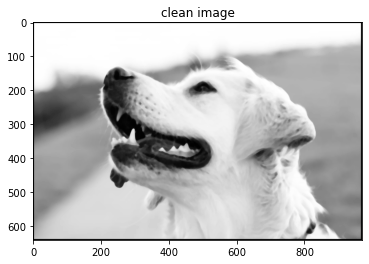

In [95]:
solt_pepper_image,clean_image = SoltP_and_clean_m_filter(image,0.1,6)
plot_image(image ,"orginal image")
plot_image(solt_pepper_image ,"salt and pepper noisy-image")
plot_image(clean_image ,"clean image")